In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import os
import numpy.fft as fft

from scipy.optimize import minimize as curve_fit

c:\Users\xiaod\.conda\envs\CCATholo\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
folder='3_21/'
folder2='4_24/'

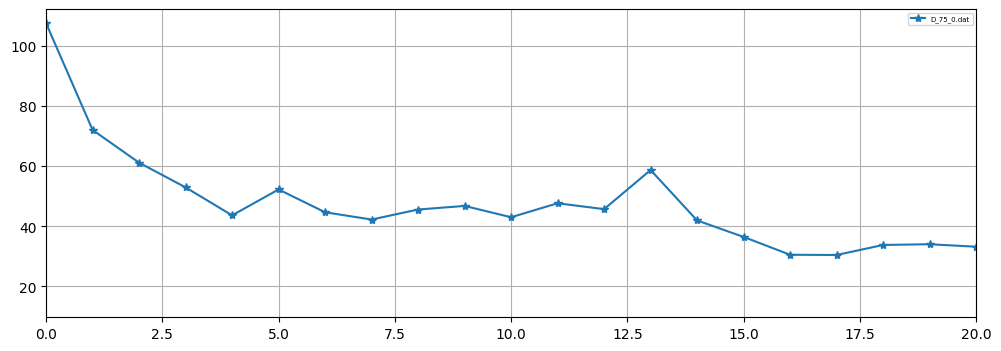

In [59]:
fig=plt.figure(figsize=(12,4))
for file in os.listdir(folder2)[1:2]:
    if file.startswith('D_75'):
        data=np.genfromtxt(folder2+file)
        # spectrum=fft.fftshift(fft.fft(data[:,1]))
        spectrum=(fft.fft(data[:,1]))
        plt.plot(np.log10(np.abs(spectrum))*20,'*-',label=file)
        plt.grid(axis='both')
plt.xlim([0,20])
plt.legend(fontsize=5)
plt.show()

C:\Users\xiaod\AppData\Local\Temp\ipykernel_20904\2193930062.py:25: RuntimeWarning: divide by zero encountered in log10
  ax[1].plot(np.log10(np.abs((spectrum_mod*Masker))),'*-',label=str(NN))


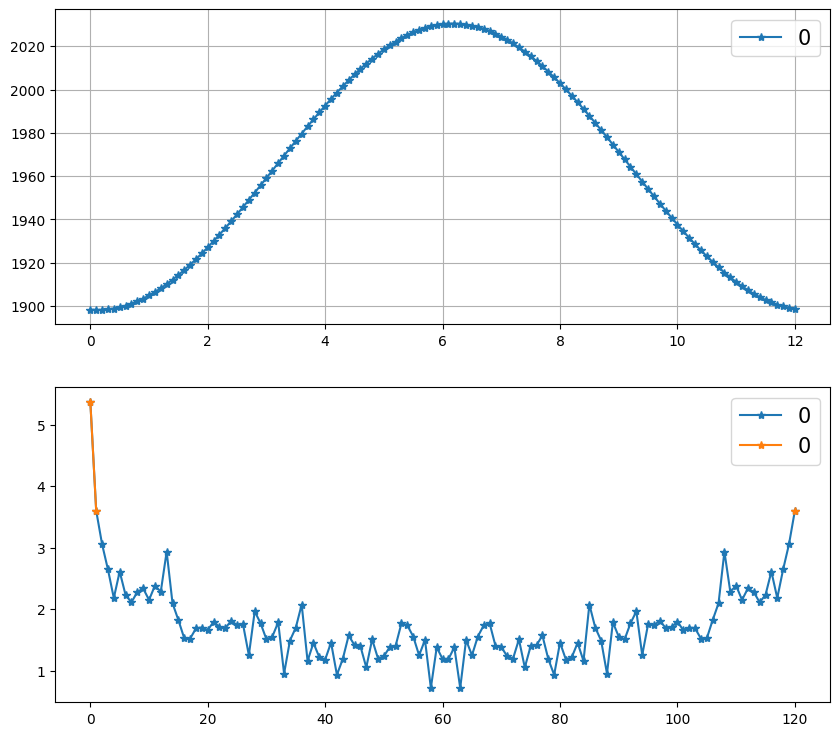

In [4]:
fig,ax=plt.subplots(2,1,figsize=(10,9))
for file in os.listdir(folder2)[1:2]:
    if file.startswith('D_75'):
        data=np.genfromtxt(folder2+file)
        spectrum=(fft.fft(data[:,1]))
        # for NN in [2,4,6,8,10]:
        for NN in range(1):#range(2,20,4):
            Masker=np.ones_like(data[:,1])
            # Masker[0:NN]=0
            # Masker[-NN+1:]=0
            # Masker[NN:-NN+1]=1e-5
            spectrum_mod=spectrum.copy()
            # spectrum_mod[13]*=(np.abs(spectrum[12])+np.abs(spectrum[14]))/2 / np.abs(spectrum[13])
            # spectrum_mod[-13]*=(np.abs(spectrum[-14])+np.abs(spectrum[-12]))/2 / np.abs(spectrum[-13])
            # spectrum_mod[10:16]*=np.abs(spectrum[40:80]).mean() / np.abs(spectrum[10:16])
            # spectrum_mod[-16:-10]*=np.abs(spectrum[40:80]).mean() / np.abs(spectrum[-16:-10])
            #spectrum_mod[0] = 0
            spectrum_mod[2:-1] = 0
            data_p=(fft.ifft((spectrum*Masker)))
            data_p_mod=(fft.ifft((spectrum_mod*Masker)))
            # ax[0].plot(0.1*np.arange(data_p.size),data_p.real,'*-',label=str(NN))
            ax[0].plot(0.1*np.arange(data_p_mod.size),data_p_mod.real,'*-',label=str(NN))
            # ax[1].plot(np.log10(np.abs(fft.ifftshift(spectrum*Masker))),'*-',label=str(NN))
            ax[1].plot(np.log10(np.abs((spectrum*Masker))),'*-',label=str(NN))
            ax[1].plot(np.log10(np.abs((spectrum_mod*Masker))),'*-',label=str(NN))
        #plt.plot(data[:,1],'-')
        ax[0].grid(axis='both')
ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)
#ax[1].set_xlim([0,20])
plt.show()

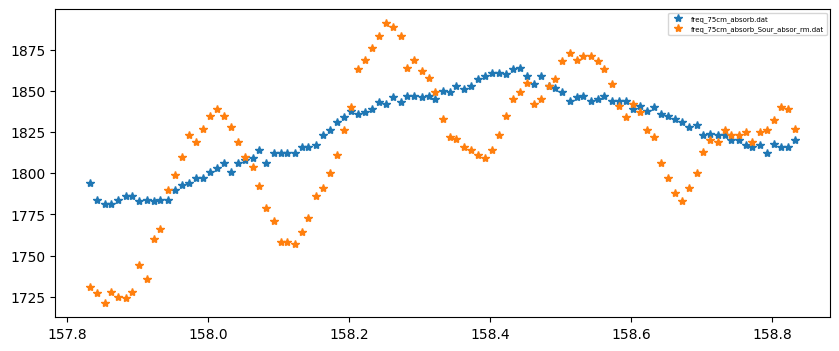

In [17]:
fig=plt.figure(figsize=(10,4))
for file in os.listdir(folder2)[5:]:
    if file.startswith('freq'):
        data=np.genfromtxt(folder2+file)
        plt.plot(data[:,0]*12/1000,(data[:,1]),'*',label=file)
        plt.grid(axis='both')
        data2=signal.convolve(data[:,1], Filter, mode='valid')
        #plt.plot(data[:,0][int(Filter.size/2)-1:-int(Filter.size/2)],data2,'-',label=file+'filtered')
plt.legend(fontsize=5)
plt.show()

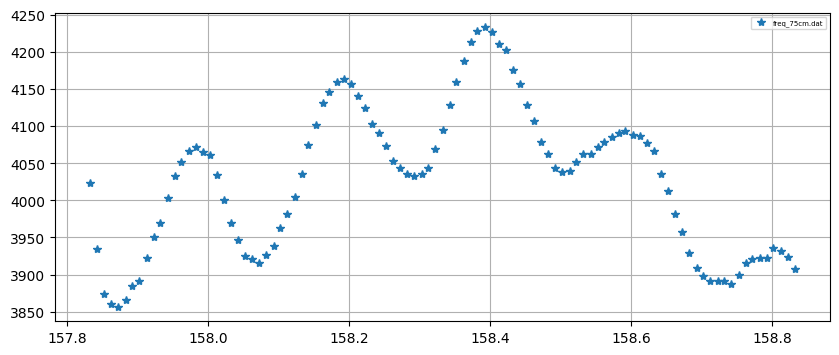

In [19]:
fig=plt.figure(figsize=(10,4))
for file in os.listdir(folder2)[4:5]:
    if file.startswith('freq'):
        data=np.genfromtxt(folder2+file)
        plt.plot(data[:,0]*12/1000,(data[:,1]),'*',label=file)
        plt.grid(axis='both')
        data2=signal.convolve(data[:,1], Filter, mode='valid')
        #plt.plot(data[:,0][int(Filter.size/2)-1:-int(Filter.size/2)],data2,'-',label=file+'filtered')
plt.legend(fontsize=5)
plt.show()

In [93]:
def fitting_MP1(filename,Z=10,Npoints=101,x0=np.zeros(3)):
    dz=np.linspace(0,Z,Npoints)
    n=0
    def fn_para(a,b,c):
        return a*(dz-b)**2+c
    print(filename)
    data=np.genfromtxt(filename)
    plt.plot(dz,(data[:,1]),'*',label=filename)
    plt.grid(axis='both')
    #data2=signal.convolve(data[:,1], Filter, mode='valid')
    #plt.plot(dz[int(Filter.size/2)-1:-int(Filter.size/2)],data2,'-',label=file+'filtered')
    def fn(para):
        a=para[0]
        b=para[1]
        c=para[2]
        r=(fn_para(a,b,c)-data[:,1])**2
        return r.mean()
    try:
        popt = curve_fit(fn,x0)
    except RuntimeError as e:
        print(e)
    #data2=fn_para(popt.x[0],popt.x[1],popt.x[2])
    data2=fn_para(*popt.x)
    print('X0:',popt.x[1])

    plt.plot(dz,data2,'-',label=filename+'fit')
    #DZ+=dz[np.where(data2==data2.max())][0]
    n=n+1
    #plt.legend(fontsize=5)
    return popt.x

In [94]:
def fitting_MP2(filename,Z=10,Npoints=101,x0=np.zeros(6)):
    dz=np.linspace(0,Z,Npoints)
    n=0
    def fn_para(a,b,c,A,k,phi0):
        return a*(dz-b)**2+c+A*np.sin(k*dz+phi0)
    print(filename)
    data=np.genfromtxt(filename)
    plt.plot(dz,(data[:,1]),'*',label=filename)
    plt.grid(axis='both')
    #data2=signal.convolve(data[:,1], Filter, mode='valid')
    #plt.plot(dz[int(Filter.size/2)-1:-int(Filter.size/2)],data2,'-',label=file+'filtered')
    def fn(para):
        r=(fn_para(*para)-data[:,1])**2
        return r.mean()
    try:
        popt = curve_fit(fn,x0)
    except RuntimeError as e:
        print(e)
    data2=fn_para(*popt.x)
    print('X0:',popt.x[1])

    plt.plot(dz,data2,'-',label=filename+'fit')
    #DZ+=dz[np.where(data2==data2.max())][0]
    n=n+1
    #plt.legend(fontsize=5)
    return popt.x

In [115]:
def fitting_MP2_(filename,Z=10,Npoints=101,x0=np.zeros(8)):
    dz=np.linspace(0,Z,Npoints)
    n=0
    def fn_para(a,b,c,d,e,k,A,B):
        return -np.abs(a)*(dz-b)**2+c+d*dz**3+e*dz**4+A*np.sin(k*dz)+B*np.cos(k*dz)
    print(filename)
    data=np.genfromtxt(filename)
    plt.plot(dz,(data[:,1]),'*',label=filename)
    plt.grid(axis='both')
    #data2=signal.convolve(data[:,1], Filter, mode='valid')
    #plt.plot(dz[int(Filter.size/2)-1:-int(Filter.size/2)],data2,'-',label=file+'filtered')
    def fn(para):
        r=(fn_para(*para)-data[:,1])**2
        return r.mean()
    try:
        bounds=np.asarray([
            [-10, -1],
            [2, 10],
            [1500, 2500],
            [-1e3, 1e3],
            [1,50],
            [1,7],
            [0, 2*np.pi],
        ])
        _x0 = bounds.mean(axis=-1)
        _x0[3] = np.random.random(1)*100
        popt = curve_fit(
            fn,x0,
            #bounds=bounds
        )
    except RuntimeError as e:
        print(e)
    data2=fn_para(*popt.x)
    print('X0:',popt.x[1])

    plt.plot(dz,data2,'-',label=filename+'fit')
    #DZ+=dz[np.where(data2==data2.max())][0]
    n=n+1
    #plt.legend(fontsize=5)
    return popt.x


4_24/D_75_1.dat
X0: 123.90422059242923


C:\Users\xiaod\AppData\Local\Temp\ipykernel_20904\1683514378.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  _x0[3] = np.random.random(1)*100


array([ 1.45990985e-01,  1.23904221e+02,  4.10703153e+03, -3.77059653e-01,
        1.07391241e-02,  6.68982708e+00, -9.96423711e+00,  8.59686697e+00])

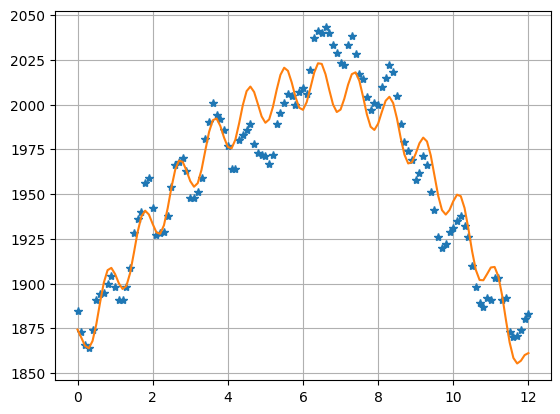

In [116]:
X0=np.array([ 1.80026718e-01,  1.12307962e+02,  4.12413835e+03, -4.64277103e-01,
        1.69688551e-02,2*np.pi])
fitting_MP2_(folder2+'D_75_1.dat',Z=12,Npoints=121,x0=np.append(X0,np.random.random(2)*10))

In [72]:
def fitting_MP3(
        filename, 
        Z=10,
        Npoints=101,
        x0=np.zeros(9)
    ):
    dz=np.linspace(0,Z,Npoints)
    n=0
    def fn_para(a,b,c,A_1,k_1,phi0_1, A_2,k_2,phi0_2):
        return a*(dz-b)**2+c+A_1*np.sin(k_1*dz+phi0_1)+A_2*np.sin(k_2*dz+phi0_2)
    print(filename)
    data=np.genfromtxt(filename)
    plt.plot(dz,(data[:,1]),'*',label=filename)
    plt.grid(axis='both')
    #data2=signal.convolve(data[:,1], Filter, mode='valid')
    #plt.plot(dz[int(Filter.size/2)-1:-int(Filter.size/2)],data2,'-',label=file+'filtered')
    def fn(para):
        r=(fn_para(*para)-data[:,1])**2
        return r.mean()
    try:
        bounds=np.asarray([
            [-5, -3],
            [2, 10],
            [1500, 2500],
            [1,50],
            [5,7],
            [0, 2*np.pi],
            [10,1000],
            [2,4],
            [0, 2*np.pi],
        ])
        _x0 = bounds.mean(axis=-1)
        popt = curve_fit(
            fn, _x0,
            bounds=bounds,
            # tol=1e-4
            options={"maxiter":100000}
        )
    except RuntimeError as e:
        print(e)
    data2=fn_para(*popt.x)
    print('X0:',popt.x[1])

    plt.plot(dz,data2,'-',label=filename+'fit')
    #DZ+=dz[np.where(data2==data2.max())][0]
    n=n+1
    #plt.legend(fontsize=5)
    return popt.x

4_24/D_75_1.dat
X0: 6.045336034932238


array([  -4.27717307,    6.04533603, 2008.68617028])

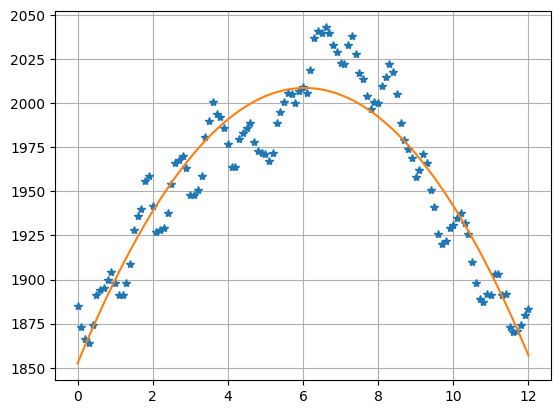

In [95]:
fitting_MP1(folder2+'D_75_1.dat',Z=12,Npoints=121,x0=np.zeros(3))

4_24/D_75_1.dat
X0: 6.043365846002517


array([  -4.25918825,    6.04336585, 2008.57583392,  -13.07227212,
         -6.6938186 , -153.16419391])

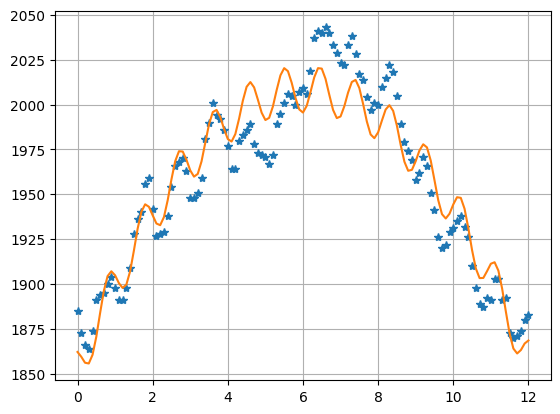

In [99]:
fitting_MP2(folder2+'D_75_1.dat',Z=12,Npoints=121,x0=np.random.random(6))

4_24/D_75_1.dat
X0: 6.057434400771627


array([-4.39379876e+00,  6.05743440e+00,  2.00960372e+03,  1.26093756e+00,
        5.04493649e+00,  0.00000000e+00,  1.00000000e+01,  2.24208923e+00,
        0.00000000e+00])

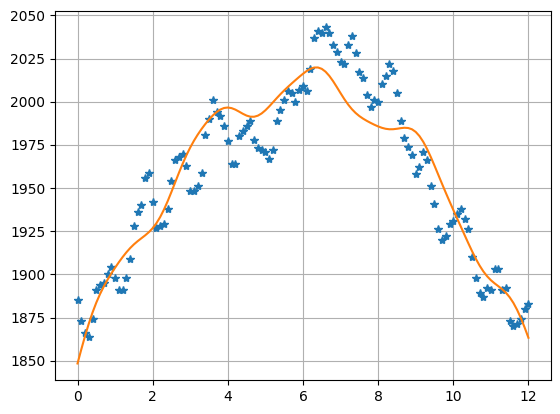

In [140]:
fitting_MP3(folder2+'D_75_1.dat',Z=12,Npoints=121,x0=np.array([-4,6,2000,-13.07227212,-6.6938186 , -153.16419391,]))

4_24/D_75_1.dat
X0: 6.04492934831268


array([-4.28447558e+00,  6.04492935e+00,  2.00874063e+03,  1.18277250e+00,
        4.23653782e+01,  8.39060814e+00,  1.76527403e+00, -5.38665844e+01,
       -1.74447713e+02])

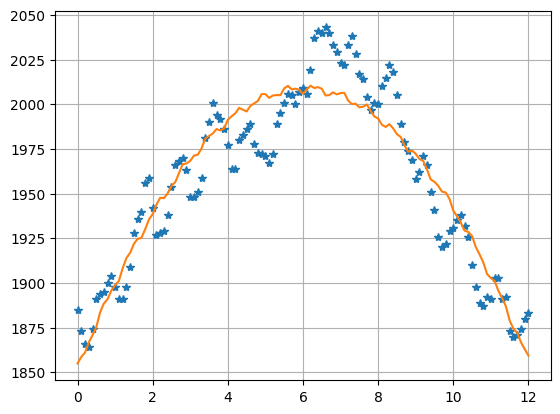

In [115]:
fitting_MP3(folder2+'D_75_1.dat',Z=12,Npoints=121,x0=np.random.random(9))